Create a measurement

In [1]:
%load_ext autoreload
%autoreload 2

import opendp.prelude as dp
dp.enable_features("contrib")

input_space = dp.atom_domain(T=float), dp.absolute_distance(T=float)
pdp_laplace_meas = dp.m.make_laplace(*input_space, 1.0)

fadp_laplace_meas = dp.c.make_pureDP_to_fixed_approxDP(pdp_laplace_meas)

Transform to approximate DP and get SMDCurve

In [2]:
adp_laplace_meas = dp.c.make_fixed_approxDP_to_approxDP(fadp_laplace_meas)

d_in = 1.0
smd_laplace = adp_laplace_meas.map(d_in=d_in)

Some new functions on the SMDCurve object

In [3]:
smd_laplace.beta(1.0)
posterior_curve = smd_laplace.get_posterior_curve(prior=0.5)
posterior_curve([0.5])

[0.6200781926018402]

And plots

In [2]:
priors = [0.1, 0.2, 0.5, 0.9, 0.99]
alphas = [i /100 for i in range(100)]

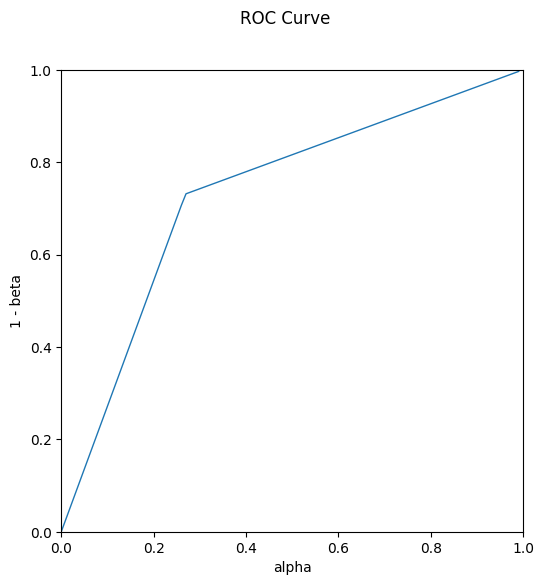

In [11]:
fig = smd_laplace.plot_tradeoff_curve(roc=True, alphas=alphas)

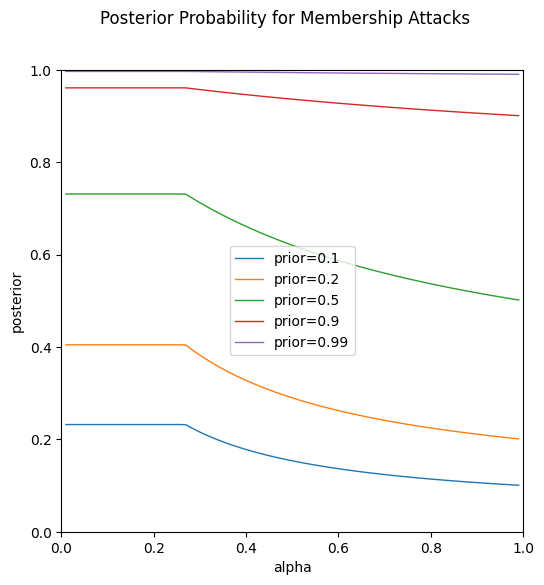

In [13]:
fig = smd_laplace.plot_posteriors(priors=priors, alphas=alphas)

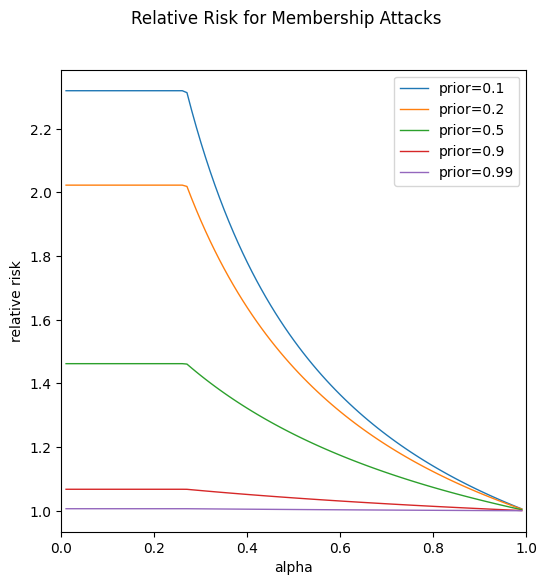

In [5]:
rrisk_plot = smd_laplace.plot_relative_risks(priors=priors, alphas=alphas)

In [2]:
input_space = dp.atom_domain(T=float), dp.absolute_distance(T=float)
zcdp_gaussian_meas = dp.m.make_gaussian(*input_space, 1.0)

dp.enable_features("contrib")
adp_gaussian_meas = dp.c.make_zCDP_to_approxDP(zcdp_gaussian_meas)

In [3]:
smd_gaussian = adp_gaussian_meas.map(d_in=1.0)

In [8]:
priors = [0.5]
alphas = [i /50 for i in range(1, 50)]

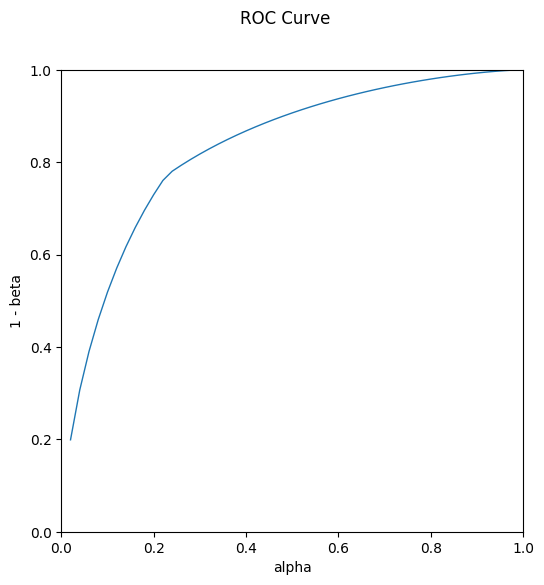

In [9]:
fig = smd_gaussian.plot_tradeoff_curve(roc=True, alphas=alphas) # TODO problem at zero.

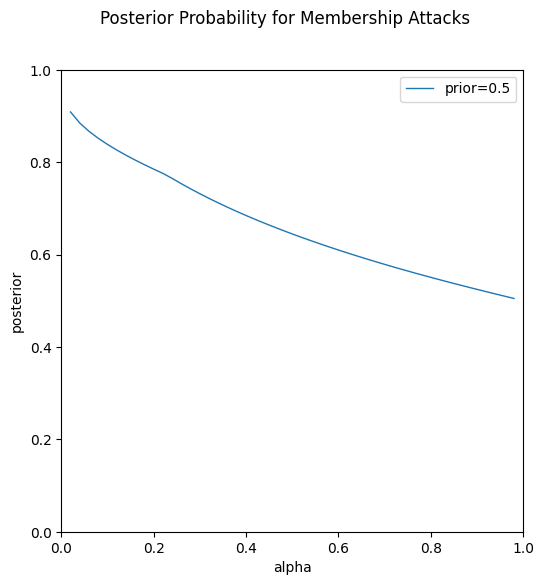

In [10]:
fig = smd_gaussian.plot_posteriors(priors=priors, alphas=alphas)

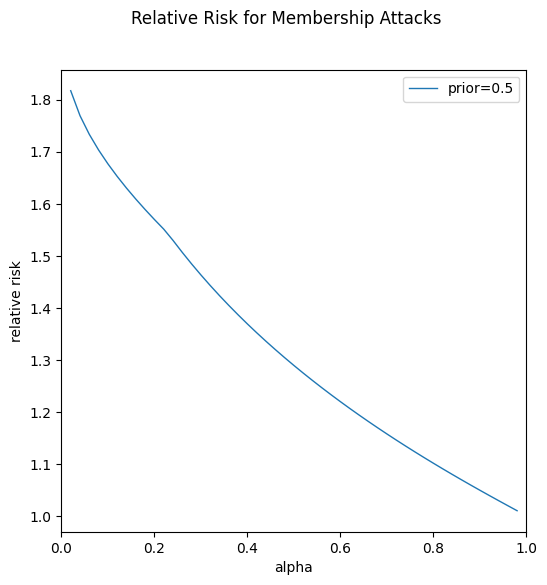

In [11]:
fig = smd_gaussian.plot_relative_risks(priors=priors, alphas=alphas)